## Single Value Decomposition for Photo Storage 
### Avery Rogers

For this project, I will be investigating how much I can reduce the storage space needed to store a black-and-white photo and still have Apple's facial recognition system recognize that photo. I will be using Single Value Decomposition to reduce a photo to a lower-rank matrix of grey pixel values that can be stored in a fraction of the space as the original photo.

In [87]:
# We will use matplot lib here to load in our image as a vector representation 
from matplotlib import image
from matplotlib import pyplot as plt
import numpy as np

# load image as array of pixels of shape (width. height, channels)
image = image.imread('Input Files/avery_photo.png')

# Investigate shape of pixel array 
print(image.shape)

# display the image as a pixel array
plt.imshow(image)
plt.show()

(1376, 1026, 4)


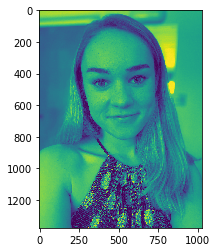

In [88]:
# Make the image black-and-white in order to operate on 2x2 matrix rather than 3x3 tensor
image = image[:,:,:3]
image = np.mean(image, axis = 2)
plt.imshow(image)
plt.show()

Now that the image has been pre-processed, I will run SVD on my (width x height) matrix of single pixel values. SVD is a strategy for apprimxating a matrix using a lower rank in a few steps: 

1. If a matrix has 500 rows and 400 columns, we can use SVD to decompose that matrix into a matrix multiplication between three matrices: `u` of dimensions (500 x 500), `s` of dimensions (width x height), and `vh` of dimensions (height X height).
2. Say we want to approximate our original matrix using a matrix of rank 10. We will then multiply the first 10 columns of `u` with the 10th diagonal of `s` and the first 10 rows of `vh`. 

This reduces our storage space very significantly - from $500 \times 400 = 200,000$ values for the original (500 x 400) matrix to one of $(500 \times 10) + (400 \times 1) + (400 \times 10) = 9,400$, a 

In [98]:
# Let's try SVD with many possible rank values, which must be smaller than the minimum of the width and height.
new_ranks = [1000, 500, 200, 100, 50, 25, 10]
rank_images = {}

for new_rank in new_ranks:
    u, s, vh = np.linalg.svd(image)

    # Now we will calculate the 1376x1026 replica of the original image using our smaller matrices
    out_image_intermediate = np.matmul(u[:, :new_rank], np.diag(s[:new_rank]))
    out_image = np.matmul(out_image_intermediate, vh[:new_rank, :])
    out_image

    # readjust the pixel scales to get a black-and-white output rather than a greenish output
    scale = max(out_image.flatten()) - min(out_image.flatten())
    out_image = np.floor((out_image - min(out_image.flatten())) / scale * 255).astype(int)
    out_image = np.repeat(out_image, 3).reshape(out_image.shape[0], out_image.shape[1], -1)
    plt.title(f'Image at Rank {new_rank}')
    save_image = np.uint8(out_image)
    plt.imsave(f'Output Files/image_rank_{new_rank}.png', save_image)
    plt.savefig(f'Output Files/graph_rank_{new_rank}.png')
    
plt.imshow(out_image)

I tried on a bunch of different ranks and imported them all into Photos. The smallest rank it recognized was rank 25, while the rank 10 photo was unrecognizable. 